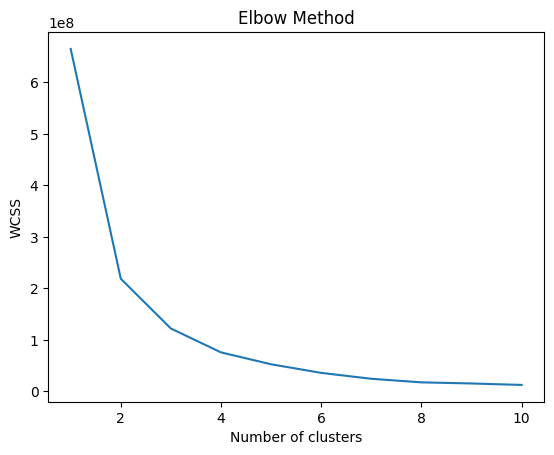

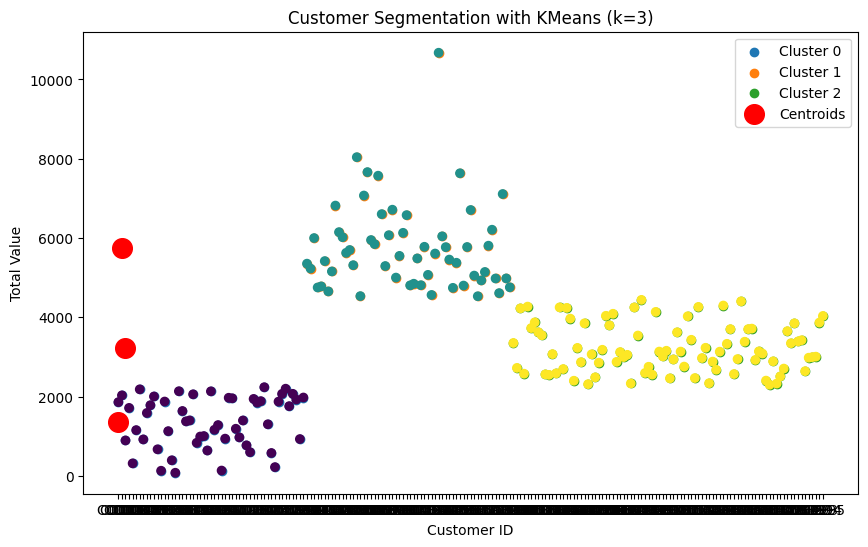



Silhouette Score: 0.5387817110061265

Davies-Bouldin Index: 0.5546790774972087

  CustomerID         Region  TotalValue  Cluster
0      C0001  South America     3354.52        2
1      C0002           Asia     1862.74        0
2      C0003  South America     2725.38        2
3      C0004  South America     5354.88        1
4      C0005           Asia     2034.24        0


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
warnings.filterwarnings('ignore')

df_customers=pd.read_csv('/content/Customers.csv')
df_products=pd.read_csv('/content/Products.csv')
df_transactions=pd.read_csv('/content/Transactions.csv')

df=pd.merge(df_transactions,df_customers,on='CustomerID')
df.head()

customer_spending = df.groupby(['CustomerID','Region'])['TotalValue'].sum().reset_index()

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(customer_spending[['TotalValue']])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
print("\n")

optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(customer_spending[['TotalValue']])

customer_spending['Cluster'] = y_kmeans

cluster_centers = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))
for cluster_label in range(optimal_k):
  plt.scatter(customer_spending[customer_spending['Cluster'] == cluster_label]['CustomerID'],
              customer_spending[customer_spending['Cluster'] == cluster_label]['TotalValue'],
              label=f'Cluster {cluster_label}')
plt.scatter(customer_spending['CustomerID'], customer_spending['TotalValue'], c=y_kmeans, cmap='viridis')

plt.scatter(range(len(cluster_centers)), cluster_centers, s=200, c='red', label='Centroids')
plt.xlabel('Customer ID')
plt.ylabel('Total Value')
plt.title(f'Customer Segmentation with KMeans (k={optimal_k})')
plt.legend()
plt.show()
print("\n")

silhouette_avg = silhouette_score(customer_spending[['TotalValue']], y_kmeans)
print(f"Silhouette Score: {silhouette_avg}\n")

davies_bouldin_avg = davies_bouldin_score(customer_spending[['TotalValue']], y_kmeans)
print(f"Davies-Bouldin Index: {davies_bouldin_avg}\n")

print(customer_spending.head())